In [1]:
# import dependencies
import requests
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
import scipy.stats as st
import datetime

In [2]:
# defining dates for KCMO crime API call
from_dates = ["2019-10-1", "2019-11-1", "2019-12-1", "2020-1-1", "2020-2-1", "2020-3-1", "2020-4-1", "2020-5-1", "2020-6-1", "2020-7-1", "2020-8-1", "2020-9-1", "2020-10-1", "2020-11-1", "2020-12-1"]
to_dates = ["2019-10-31", "2019-11-30", "2019-12-31", "2020-1-31", "2020-2-29", "2020-3-31", "2020-4-30", "2020-5-31", "2020-6-30", "2020-7-31", "2020-8-31", "2020-9-30", "2020-10-31", "2020-11-30", "2020-12-31"]

In [3]:
# lists for loop
from_date = []
to_date = []
incidents = []
parentIncidentType = []

# for loop API call
for i, j in zip(from_dates, to_dates):
    from_date = i + "T00:00:00.000Z"
    from_dates.append([from_date])
    to_date = j + "T23:59:59.999Z"
    to_dates.append([to_date])
    payload = {}
    from_date = from_date
    to_date = to_date
    pageSize = "100000"
    payload["limit"] = pageSize
    payload["offset"] = 0
    payload["geoJson"] = {"type": "Polygon", "coordinates": [[[-94.32951884471989, 38.996363264325836], 
    [-94.64880900585229, 38.996363264325836], [-94.64880900585229, 39.080896419140764], 
    [-94.32951884471989, 39.080896419140764], [-94.32951884471989, 38.996363264325836]]]}
    payload["projection"]= "true"
    payload["propertyMap"] = {"toDate": to_date, "fromDate": from_date, "pageSize": pageSize, 
    "parentIncidentTypeIds": "149,150,148,8,97,104,165,98,100,179,178,180,101,99,103,163,168,166,12,161,14,16,15", 
    "zoomLevel": "12", "latitude": "39.03864248355025", "longitude": "-94.48916392528609", "days": "1,2,3,4,5,6,7", 
    "startHour": "0", "endHour": "24", "timezone": "+00:00", "relativeDate": "custom", 
    "agencyIds": "47860,1279,957,165,118,undefined,undefined"}
    url = "https://ce-portal-service.commandcentral.com/api/v1.0/public/incidents"
    headers = {'Content-Type': 'application/json'}
    payload  = json.dumps(payload)
    response = requests.request("POST", url, data=payload, headers=headers)
    print(i + " to " + j + ":")
    print(len(pd.DataFrame(response.json()['result']['list']['incidents'])))
    incident = len(pd.DataFrame(response.json()['result']['list']['incidents']))
    incidents.append([incident])
        
    try:
        #print(pd.DataFrame(pd.DataFrame(response.json()['result']['list']['incidents'])['parentIncidentType'].value_counts()))
        incident_type = pd.DataFrame(pd.DataFrame(response.json()['result']['list']['incidents'])['parentIncidentType'].value_counts())
        parentIncidentType.append([incident_type])
        
    except (KeyError, TypeError):
        pass
    print("---------------------------------------")

2019-10-1 to 2019-10-31:
84
---------------------------------------
2019-11-1 to 2019-11-30:
97
---------------------------------------
2019-12-1 to 2019-12-31:
109
---------------------------------------
2020-1-1 to 2020-1-31:
0
---------------------------------------
2020-2-1 to 2020-2-29:
0
---------------------------------------
2020-3-1 to 2020-3-31:
0
---------------------------------------
2020-4-1 to 2020-4-30:
0
---------------------------------------
2020-5-1 to 2020-5-31:
0
---------------------------------------
2020-6-1 to 2020-6-30:
0
---------------------------------------
2020-7-1 to 2020-7-31:
0
---------------------------------------
2020-8-1 to 2020-8-31:
0
---------------------------------------
2020-9-1 to 2020-9-30:
0
---------------------------------------
2020-10-1 to 2020-10-31:
11871
---------------------------------------
2020-11-1 to 2020-11-30:
13219
---------------------------------------
2020-12-1 to 2020-12-31:
14590
-------------------------------------

TypeError: can only concatenate list (not "str") to list

In [4]:
# slicing, cleaning, and reformatting data from lists
from_dates = from_dates[0:15]
to_dates = to_dates[0:15]
incidents = [val for incident in incidents for val in incident] 

In [5]:
# creating dataframe for KCMO crime data
crime_data = {
    "Start Date": from_dates,
    "End Date": to_dates,
    "Total Incidents": incidents 
}
crime_data = pd.DataFrame(crime_data)

In [6]:
# translating dates to datetime data type
crime_data['Start Date'] = pd.to_datetime(crime_data['Start Date'])
crime_data['End Date'] = pd.to_datetime(crime_data['End Date'])

# printing KCMO crime dataframe
crime_data

,Start Date,End Date,Total Incidents
0,2019-10-01,2019-10-31,84
1,2019-11-01,2019-11-30,97
2,2019-12-01,2019-12-31,109
3,2020-01-01,2020-01-31,0
4,2020-02-01,2020-02-29,0
5,2020-03-01,2020-03-31,0
6,2020-04-01,2020-04-30,0
7,2020-05-01,2020-05-31,0
8,2020-06-01,2020-06-30,0
9,2020-07-01,2020-07-31,0


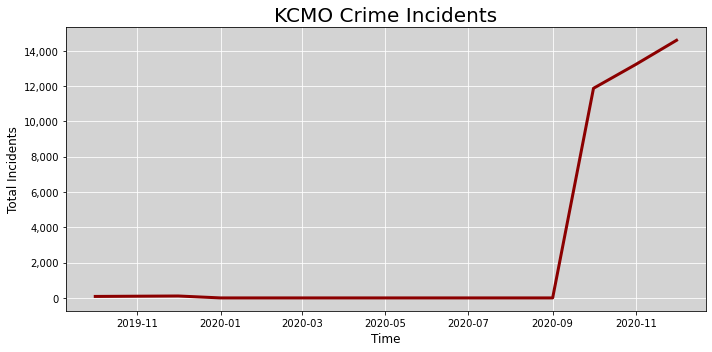

In [7]:
# generating timeseries plot from KCMO crime dataframe
plt.figure(figsize = (10, 5))
plt.plot(crime_data["Start Date"], crime_data["Total Incidents"], color = "darkred", linewidth = 3)
ax = plt.gca()
ax.set_facecolor('lightgray')
plt.title("KCMO Crime Incidents", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Total Incidents", fontsize = 12)

# thousands comma separator for y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.grid(True, color = "white")
plt.savefig("Images/kc_crime.png")
plt.show()

In [8]:
# creating dataframes for month's with incident type data in KCMO
october19 = parentIncidentType[0][0].reset_index()
october19 = october19.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})
october19['Rate (%)']= round(october19.Incidents / october19['Incidents'].sum() * 100, 2)

november19 = parentIncidentType[1][0].reset_index()
november19 = november19.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})
november19['Rate (%)']= round(november19.Incidents / november19['Incidents'].sum() * 100, 2)

december19 = parentIncidentType[2][0].reset_index()
december19 = december19.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})
december19['Rate (%)']= round(december19.Incidents / december19['Incidents'].sum() * 100, 2)

october20 = parentIncidentType[3][0].reset_index()
october20 = october20.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})
october20['Rate (%)']= round(october20.Incidents / october20['Incidents'].sum() * 100, 2)

november20 = parentIncidentType[4][0].reset_index()
november20 = november20.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})
november20['Rate (%)']= round(november20.Incidents / november20['Incidents'].sum() * 100, 2)

december20 = parentIncidentType[5][0].reset_index()
december20 = december20.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})
december20['Rate (%)']= round(december20.Incidents / december20['Incidents'].sum() * 100, 2)

In [9]:
print("Oct. 2019 Crime")
october19['Date'] = 'October 2019'
october19['Date'] = pd.to_datetime(october19['Date'])
october19_reformat = october19.pivot_table('Incidents', ['Date'], 'Crime Type')
october19

Oct. 2019 Crime


,Crime Type,Incidents,Rate (%),Date
0,Theft,49,58.33,2019-10-01
1,Sexual Offense,11,13.10,2019-10-01
2,Theft from Vehicle,8,9.52,2019-10-01
3,Assault,5,5.95,2019-10-01
4,Quality of Life,4,4.76,2019-10-01
5,Breaking & Entering,3,3.57,2019-10-01
6,Theft of Vehicle,2,2.38,2019-10-01
7,Property Crime,1,1.19,2019-10-01
8,Assault,1,1.19,2019-10-01


In [10]:
print("Nov. 2019 Crime")
november19['Date'] = 'November 2019'
november19['Date'] = pd.to_datetime(november19['Date'])
november19_reformat = november19.pivot_table('Incidents', ['Date'], 'Crime Type')
november19

Nov. 2019 Crime


,Crime Type,Incidents,Rate (%),Date
0,Theft,56,57.73,2019-11-01
1,Sexual Offense,12,12.37,2019-11-01
2,Theft from Vehicle,11,11.34,2019-11-01
3,Assault,6,6.19,2019-11-01
4,Quality of Life,4,4.12,2019-11-01
5,Breaking & Entering,3,3.09,2019-11-01
6,Theft of Vehicle,3,3.09,2019-11-01
7,Property Crime,1,1.03,2019-11-01
8,Assault,1,1.03,2019-11-01


In [11]:
print("Dec. 2019 Crime")
december19['Date'] = 'December 2019'
december19['Date'] = pd.to_datetime(december19['Date'])
december19_reformat = december19.pivot_table('Incidents', ['Date'], 'Crime Type')
december19

Dec. 2019 Crime


,Crime Type,Incidents,Rate (%),Date
0,Theft,64,58.72,2019-12-01
1,Theft from Vehicle,13,11.93,2019-12-01
2,Sexual Offense,12,11.01,2019-12-01
3,Assault,6,5.50,2019-12-01
4,Breaking & Entering,4,3.67,2019-12-01
5,Theft of Vehicle,4,3.67,2019-12-01
6,Quality of Life,4,3.67,2019-12-01
7,Property Crime,1,0.92,2019-12-01
8,Assault,1,0.92,2019-12-01


In [12]:
print("Oct. 2020 Crime")
october20['Date'] = 'October 2020'
october20['Date'] = pd.to_datetime(october20['Date'])
october20_reformat = october20.pivot_table('Incidents', ['Date'], 'Crime Type')
october20

Oct. 2020 Crime


,Crime Type,Incidents,Rate (%),Date
0,Assault,3148,26.52,2020-10-01
1,Theft,2255,19.00,2020-10-01
2,Theft from Vehicle,1675,14.11,2020-10-01
3,Property Crime,1462,12.32,2020-10-01
4,Theft of Vehicle,1144,9.64,2020-10-01
5,Quality of Life,890,7.50,2020-10-01
6,Breaking & Entering,750,6.32,2020-10-01
7,Robbery,347,2.92,2020-10-01
8,Sexual Offense,171,1.44,2020-10-01
9,Homicide,19,0.16,2020-10-01


In [13]:
print("Nov. 2020 Crime")
november20['Date'] = 'November 2020'
november20['Date'] = pd.to_datetime(november20['Date'])
november20_reformat = november20.pivot_table('Incidents', ['Date'], 'Crime Type')
november20

Nov. 2020 Crime


,Crime Type,Incidents,Rate (%),Date
0,Assault,3387,25.62,2020-11-01
1,Theft,2520,19.06,2020-11-01
2,Theft from Vehicle,1900,14.37,2020-11-01
3,Property Crime,1577,11.93,2020-11-01
4,Theft of Vehicle,1298,9.82,2020-11-01
5,Quality of Life,976,7.38,2020-11-01
6,Breaking & Entering,839,6.35,2020-11-01
7,Robbery,381,2.88,2020-11-01
8,Sexual Offense,185,1.40,2020-11-01
9,Assault,81,0.61,2020-11-01


In [14]:
print("Dec. 2020 Crime")
december20['Date'] = 'December 2020'
december20['Date'] = pd.to_datetime(december20['Date'])
december20_reformat = december20.pivot_table('Incidents', ['Date'], 'Crime Type')
december20

Dec. 2020 Crime


,Crime Type,Incidents,Rate (%),Date
0,Assault,3387,23.21,2020-12-01
1,Theft,2760,18.92,2020-12-01
2,Theft from Vehicle,2161,14.81,2020-12-01
3,Property Crime,1577,10.81,2020-12-01
4,Theft of Vehicle,1455,9.97,2020-12-01
5,Quality of Life,1042,7.14,2020-12-01
6,Breaking & Entering,955,6.55,2020-12-01
7,Robbery,419,2.87,2020-12-01
8,Assault,395,2.71,2020-12-01
9,Property Crime,225,1.54,2020-12-01


In [15]:
appended_df = october19_reformat.append(november19_reformat)
appended_df = appended_df.append(december19_reformat)
appended_df = appended_df.append(october20_reformat)
appended_df = appended_df.append(november20_reformat)
appended_df = appended_df.append(december20_reformat)
appended_df = appended_df.groupby(appended_df.columns, axis=1).sum()

appended_df['Total Incidents']= appended_df.iloc[:, 0:13].sum(axis=1)
appended_df['Assault True']= appended_df.iloc[:, 0:2].sum(axis=1)
appended_df['Sum of Thefts']= appended_df.iloc[:, 10:13].sum(axis=1)
appended_df['Sum Property Crime']= appended_df.iloc[:, 5:7].sum(axis=1)
appended_df['Sum Homicide']= appended_df.iloc[:, 3:5].sum(axis=1)
appended_df = appended_df.fillna(0)
organized_df = pd.DataFrame({"Theft": (appended_df["Sum of Thefts"]),
                             "Robbery": (appended_df["Robbery"]),
                             "Assault": (appended_df["Assault True"]/appended_df['Total Incidents']*100).map("{:.1f}%".format),
                             "Breaking & Entering": (appended_df["Breaking & Entering"]/appended_df['Total Incidents']*100).map("{:.1f}%".format),
                             "Property Crime": (appended_df["Sum Property Crime"]/appended_df['Total Incidents']*100).map("{:.1f}%".format),
                             "Quality of Life": (appended_df["Quality of Life"]/appended_df['Total Incidents']*100).map("{:.1f}%".format),
                             "Sexual Offense": (appended_df["Sexual Offense"]/appended_df['Total Incidents']*100).map("{:.1f}%".format),
                             "Homicide": (appended_df["Sum Homicide"]/appended_df['Total Incidents']*100).map("{:.1f}%".format)
                            })
appended_df

,Assault,Assault,Breaking & Entering,Homicide,Other ;Homicide,Property Crime,Property Crime,Quality of Life,Robbery,Sexual Offense,Theft,Theft from Vehicle,Theft of Vehicle,Total Incidents,Assault True,Sum of Thefts,Sum Property Crime,Sum Homicide
Date,,,,,,,,,,,,,,,,,,
2019-10-01,1.0,5.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,11.0,49.0,8.0,2.0,84.0,6.0,59.0,1.0,0.0
2019-11-01,1.0,6.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,12.0,56.0,11.0,3.0,97.0,7.0,70.0,1.0,0.0
2019-12-01,1.0,6.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,12.0,64.0,13.0,4.0,109.0,7.0,81.0,1.0,0.0
2020-10-01,4.0,3148.0,750.0,19.0,1.0,5.0,1462.0,890.0,347.0,171.0,2255.0,1675.0,1144.0,11871.0,3152.0,5074.0,1467.0,20.0
2020-11-01,81.0,3387.0,839.0,21.0,1.0,53.0,1577.0,976.0,381.0,185.0,2520.0,1900.0,1298.0,13219.0,3468.0,5718.0,1630.0,22.0
2020-12-01,395.0,3387.0,955.0,22.0,1.0,225.0,1577.0,1042.0,419.0,191.0,2760.0,2161.0,1455.0,14590.0,3782.0,6376.0,1802.0,23.0


In [16]:
organized_df['Theft & Robbery'] = organized_df.iloc[:, 0:-2].sum(axis=1)
organized_df['Theft & Robbery'] = (organized_df['Theft & Robbery']/appended_df['Total Incidents']*100).map("{:.1f}%".format)
organized_df = organized_df[['Theft & Robbery', 'Assault', 'Property Crime', 'Breaking & Entering', 'Quality of Life', 'Sexual Offense', 'Homicide']]
organized_df

,Theft & Robbery,Assault,Property Crime,Breaking & Entering,Quality of Life,Sexual Offense,Homicide
Date,,,,,,,
2019-10-01,70.2%,7.1%,1.2%,3.6%,4.8%,13.1%,0.0%
2019-11-01,72.2%,7.2%,1.0%,3.1%,4.1%,12.4%,0.0%
2019-12-01,74.3%,6.4%,0.9%,3.7%,3.7%,11.0%,0.0%
2020-10-01,45.7%,26.6%,12.4%,6.3%,7.5%,1.4%,0.2%
2020-11-01,46.1%,26.2%,12.3%,6.3%,7.4%,1.4%,0.2%
2020-12-01,46.6%,25.9%,12.4%,6.5%,7.1%,1.3%,0.2%


In [17]:
crime_totals = crime_data.rename(columns = {'Start Date': 'Date', 'Total Incidents': 'Incidents'})
crime_types_df = pd.merge(crime_totals, organized_df, on = "Date", how = 'outer')
crime_types_df = crime_types_df.fillna(0)
crime_types_df

,Date,End Date,Incidents,Theft & Robbery,Assault,Property Crime,Breaking & Entering,Quality of Life,Sexual Offense,Homicide
0,2019-10-01,2019-10-31,84,70.2%,7.1%,1.2%,3.6%,4.8%,13.1%,0.0%
1,2019-11-01,2019-11-30,97,72.2%,7.2%,1.0%,3.1%,4.1%,12.4%,0.0%
2,2019-12-01,2019-12-31,109,74.3%,6.4%,0.9%,3.7%,3.7%,11.0%,0.0%
3,2020-01-01,2020-01-31,0,0,0,0,0,0,0,0
4,2020-02-01,2020-02-29,0,0,0,0,0,0,0,0
5,2020-03-01,2020-03-31,0,0,0,0,0,0,0,0
6,2020-04-01,2020-04-30,0,0,0,0,0,0,0,0
7,2020-05-01,2020-05-31,0,0,0,0,0,0,0,0
8,2020-06-01,2020-06-30,0,0,0,0,0,0,0,0
9,2020-07-01,2020-07-31,0,0,0,0,0,0,0,0


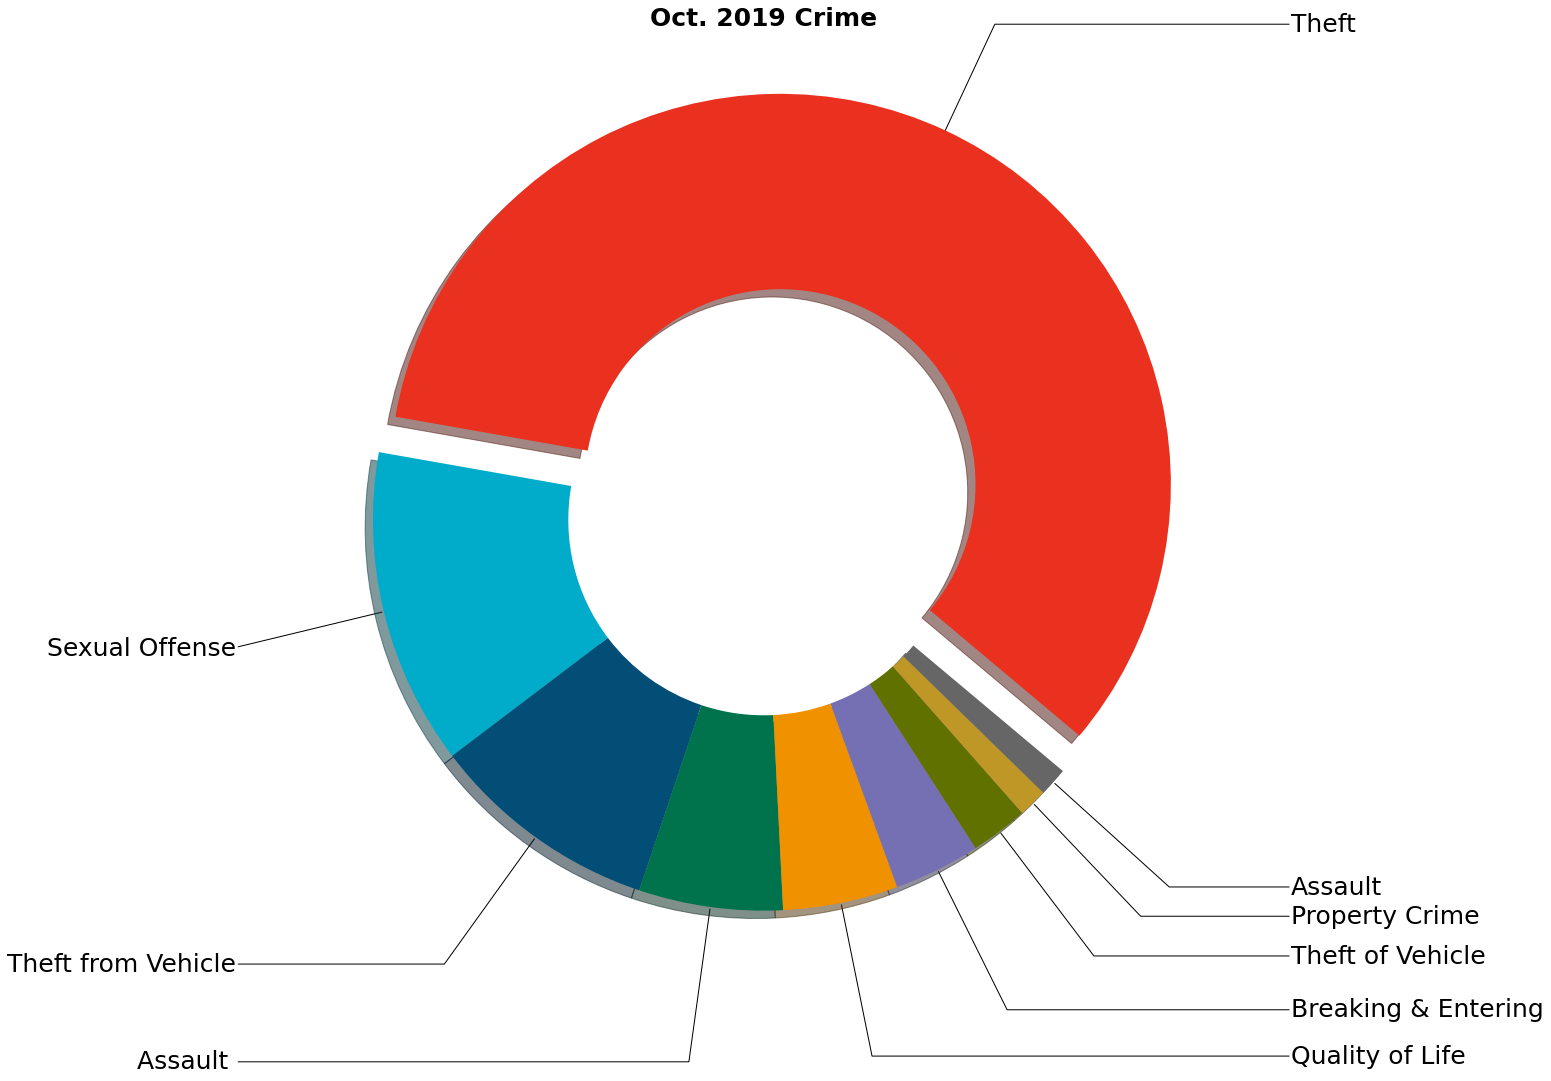

In [18]:
# generating pie charts for incident types for each month
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

colors = ['#ea311f', '#01acca', '#024e76', '#00734c', '#f09100', '#7570b3', '#607100', '#bf9727', '#666666'] 

wedges, texts = ax.pie(october19["Incidents"], wedgeprops=dict(width=0.5), colors = colors, explode = explode, 
shadow = True, startangle=-40)

bbox_props = dict(boxstyle="square,pad=0", fc="w", ec="k", lw=0)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(october19["Crime Type"][i], fontsize = 25, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), 
    horizontalalignment=horizontalalignment, **kw)

plt.title("Oct. 2019 Crime", fontsize = "25", fontweight = 'bold')
plt.tight_layout()
plt.savefig("Images/october19.png")

plt.show()

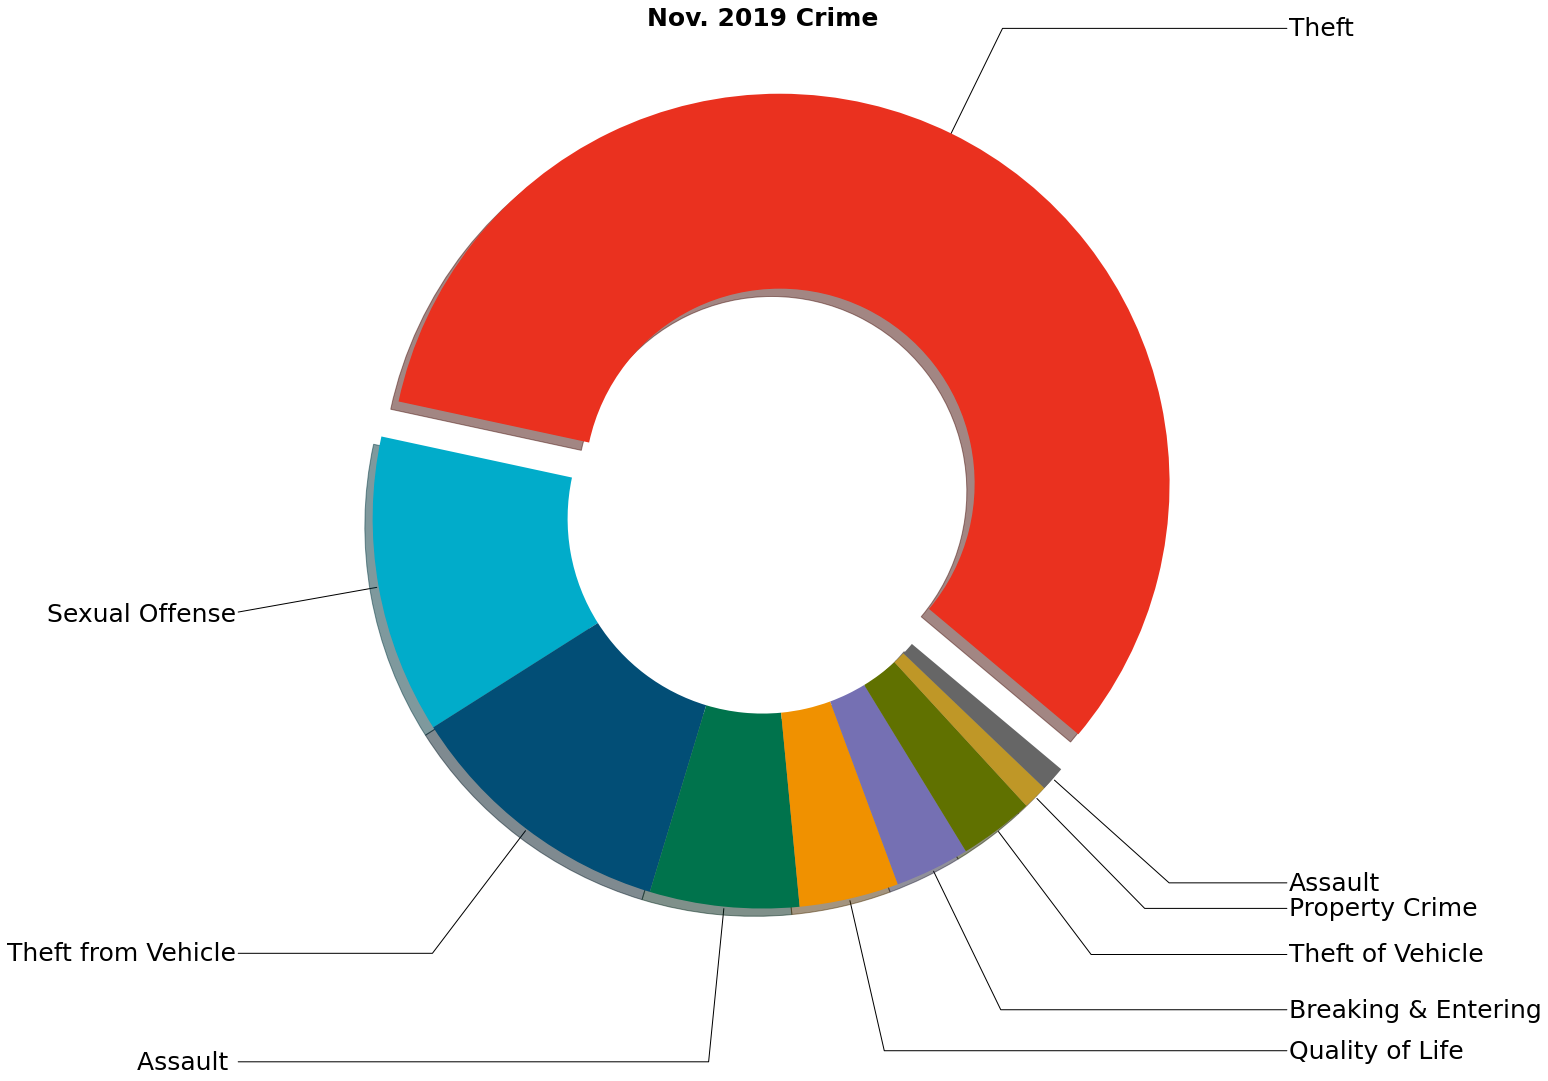

In [19]:
fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(november19["Incidents"], wedgeprops=dict(width=0.5), colors = colors, explode = explode, shadow = True, startangle=-40)

bbox_props = dict(boxstyle="square,pad=0", fc="w", ec="k", lw=0)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(november19["Crime Type"][i], fontsize = 25, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)

plt.title("Nov. 2019 Crime", fontsize = "25", fontweight = "bold")
plt.tight_layout()
plt.savefig("Images/november19.png")

plt.show()

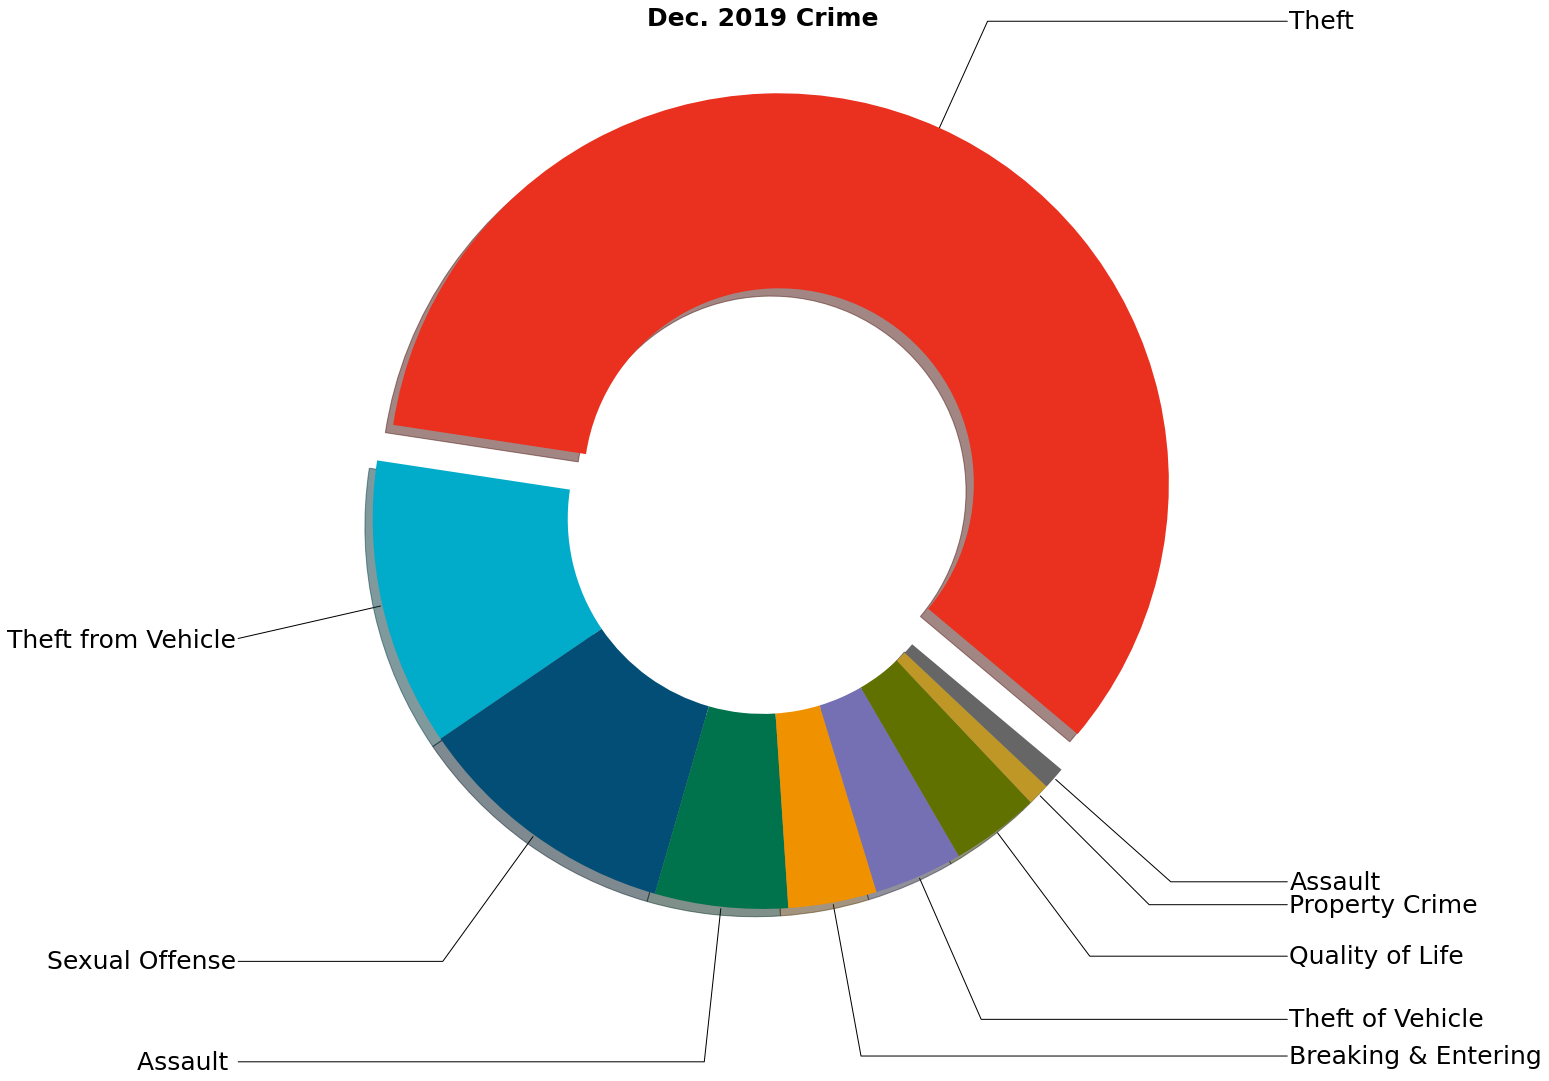

In [20]:
fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(december19["Incidents"], wedgeprops=dict(width=0.5), colors = colors, explode = explode, shadow = True, startangle=-40)

bbox_props = dict(boxstyle="square,pad=0", fc="w", ec="k", lw=0)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(december19["Crime Type"][i], fontsize = 25, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)

plt.title("Dec. 2019 Crime", fontsize = "25", fontweight = "bold")
plt.tight_layout()
plt.savefig("Images/december19.png")

plt.show()

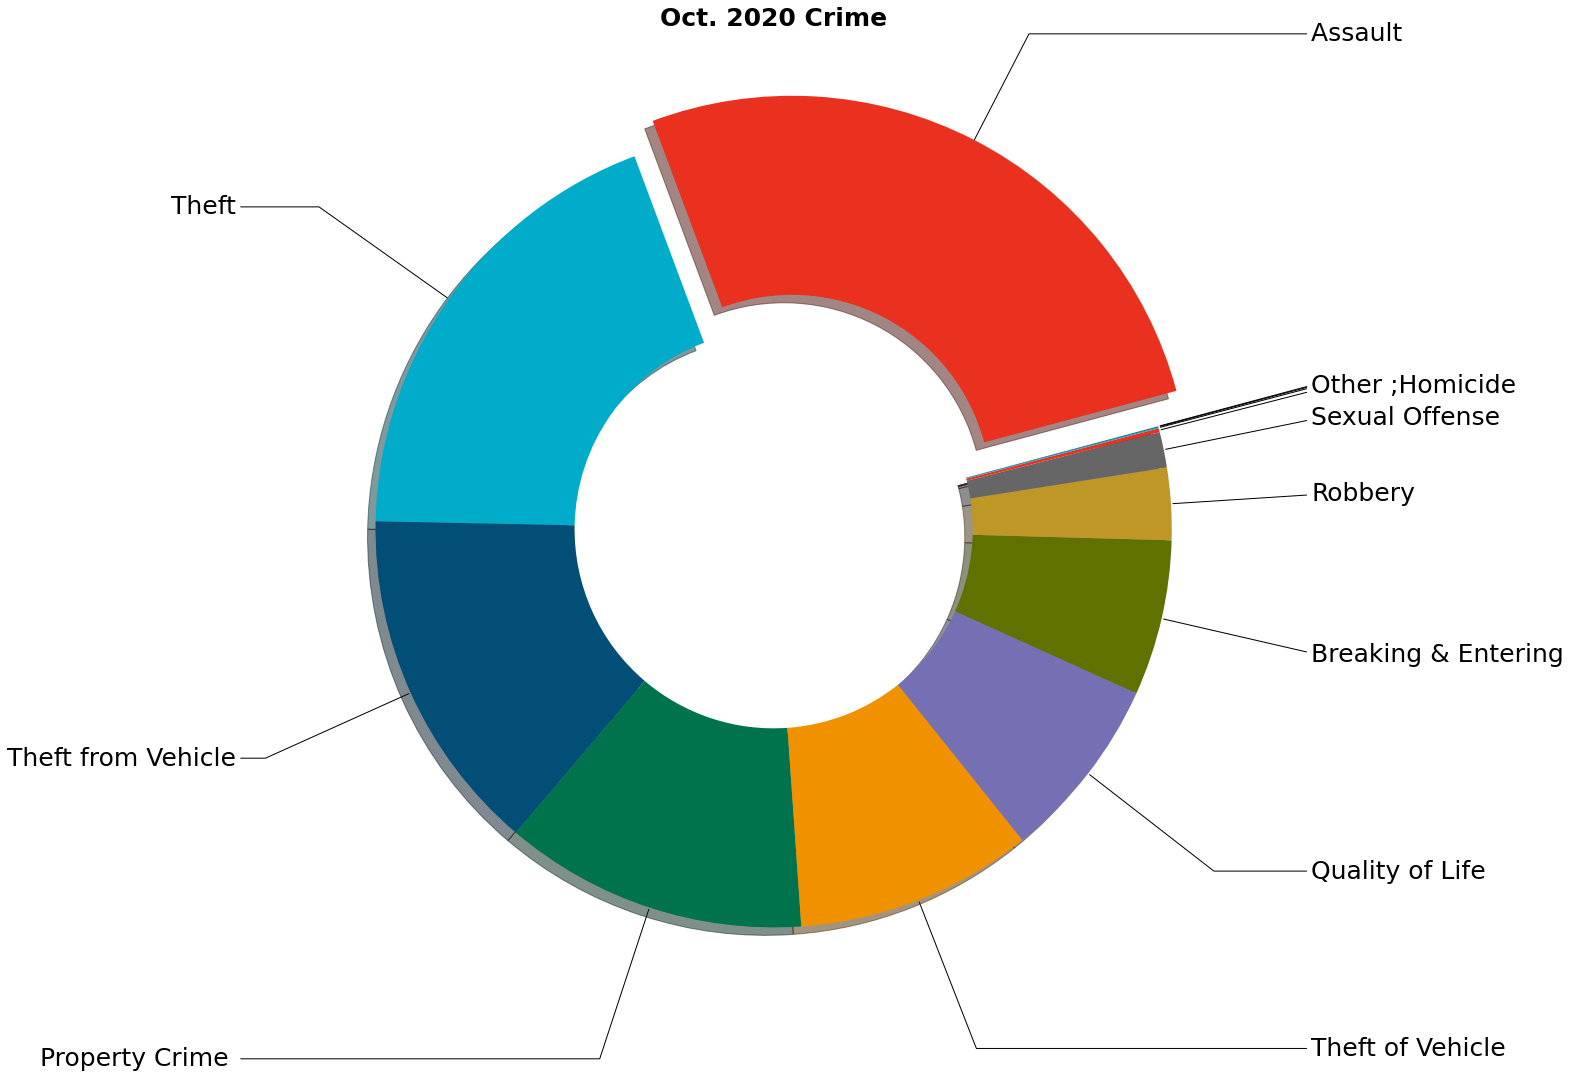

In [21]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(october20["Incidents"], wedgeprops=dict(width=0.5), colors = colors, explode = explode, shadow = True, startangle=15)

bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(october20["Crime Type"][i], fontsize = 25, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)

plt.title("Oct. 2020 Crime", fontsize = "25", fontweight = "bold")
plt.tight_layout()
plt.savefig("Images/october20.png")

plt.show()

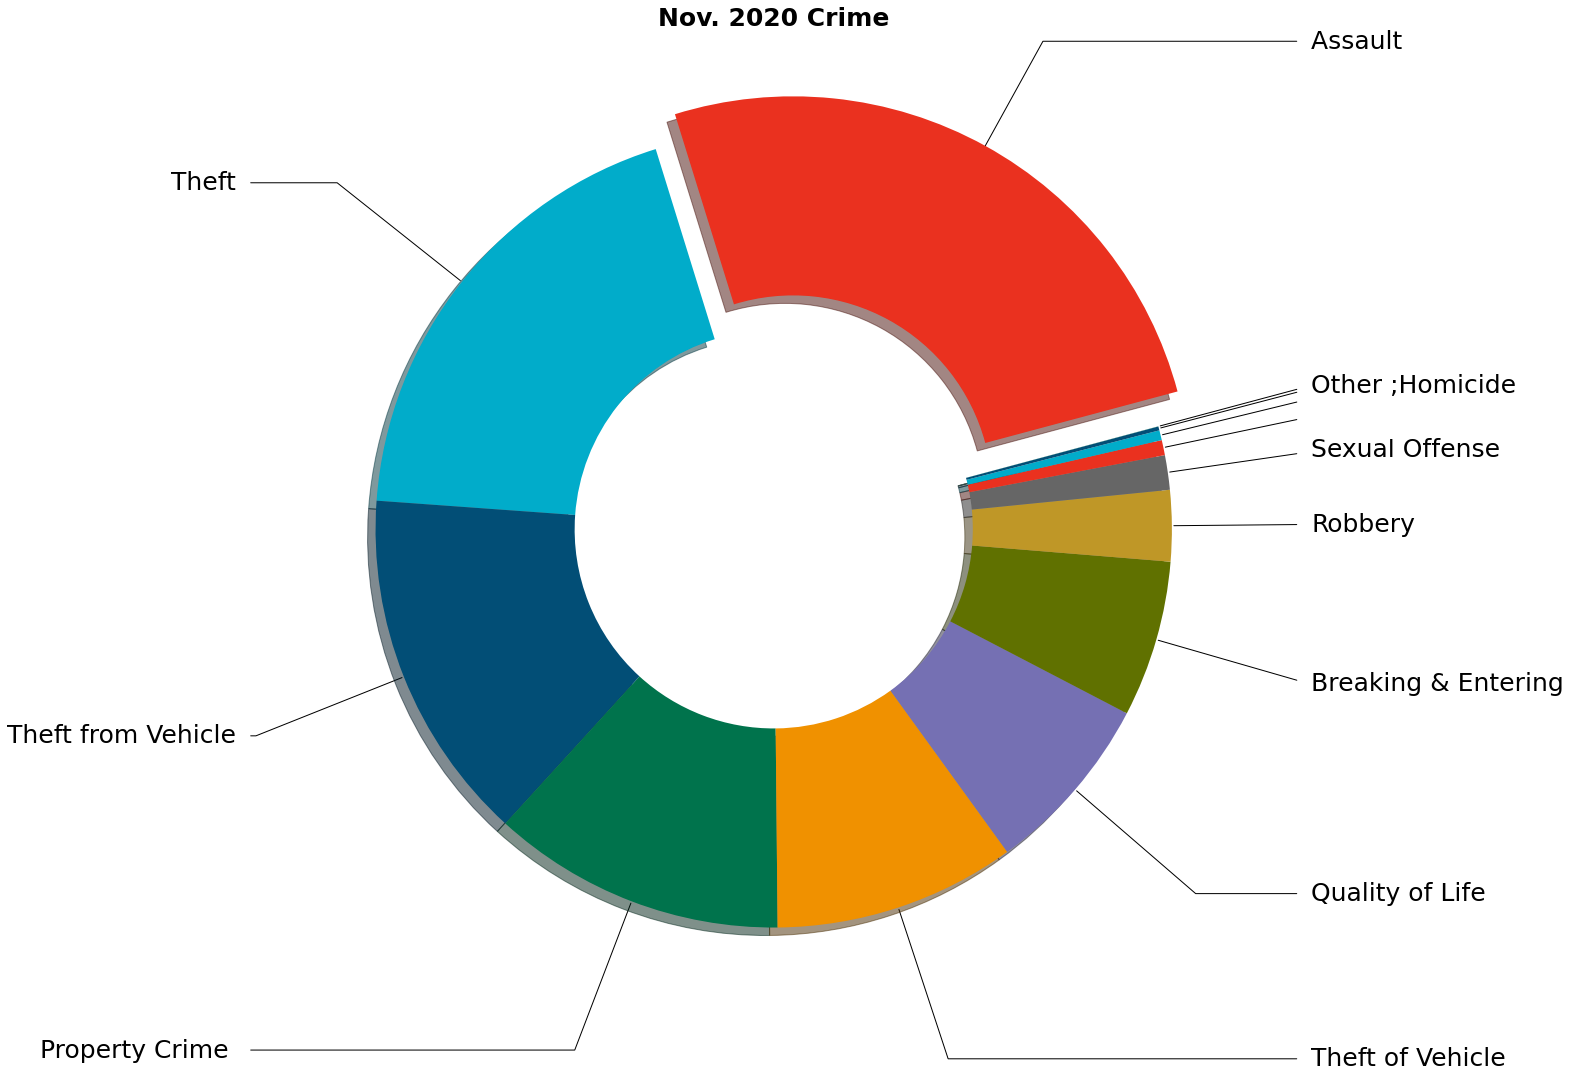

In [22]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(november20["Incidents"], wedgeprops=dict(width=0.5), colors = colors, explode = explode, shadow = True, startangle=15)

bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(november20["Crime Type"][i], fontsize = 25, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)

plt.title("Nov. 2020 Crime", fontsize = "25", fontweight = "bold")
plt.tight_layout()
plt.savefig("Images/november20.png")

plt.show()

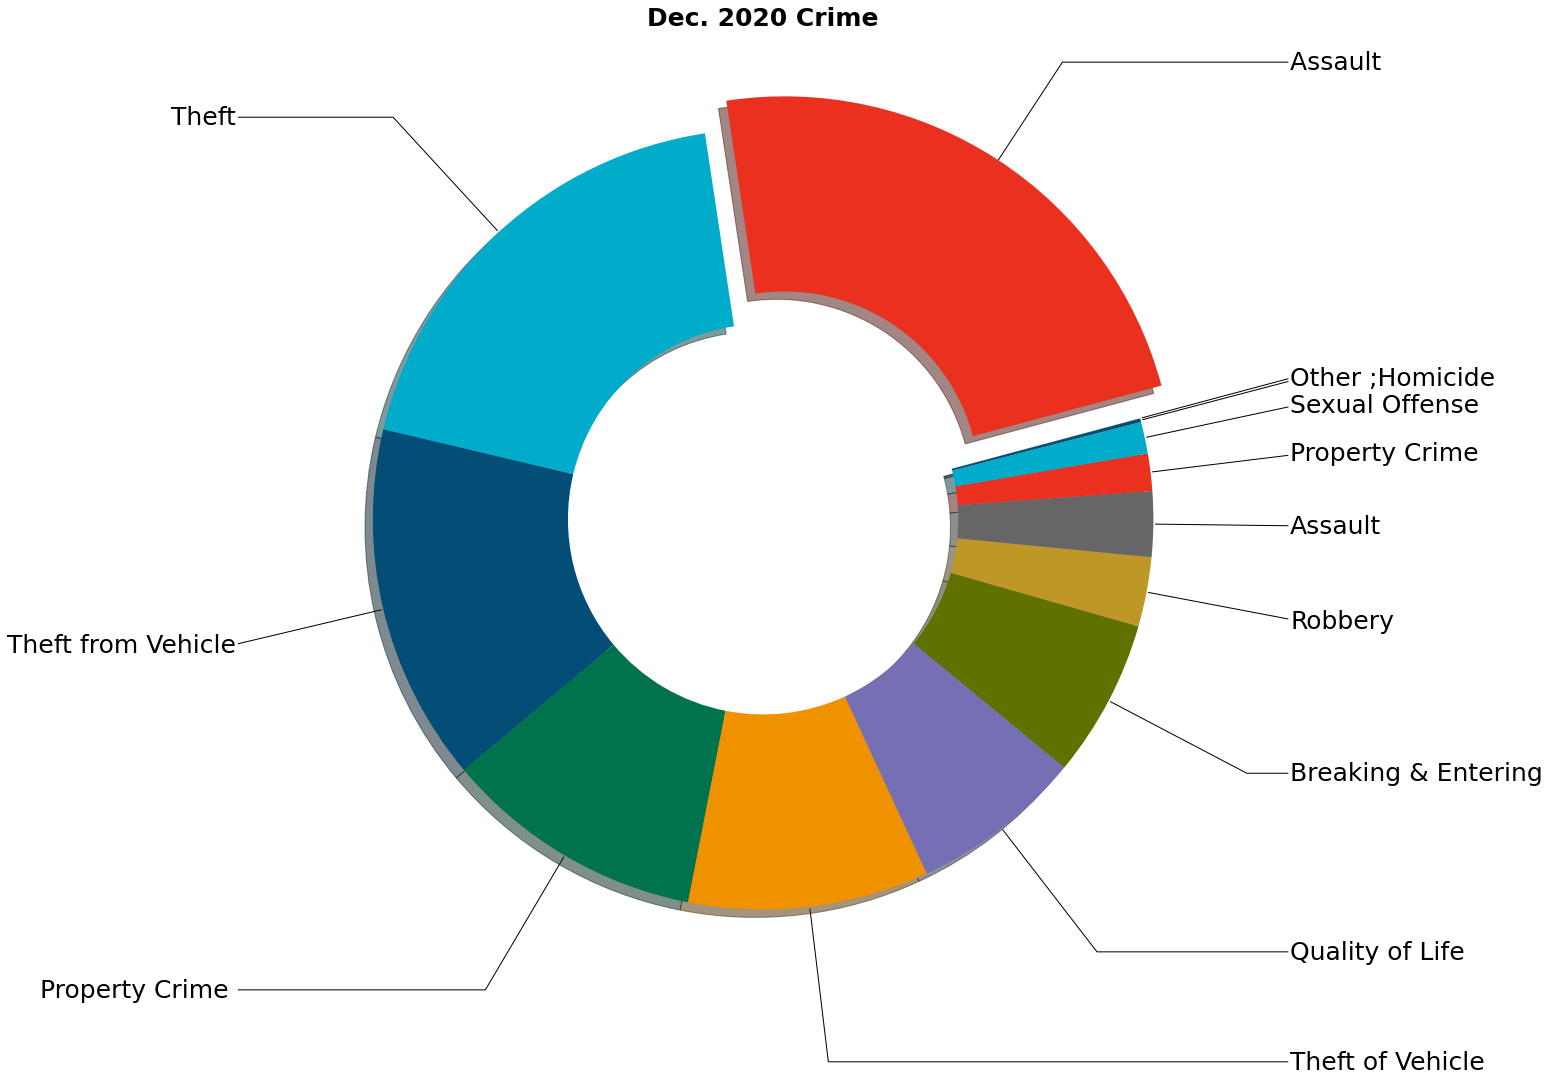

In [23]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(december20["Incidents"], wedgeprops=dict(width=0.5), colors = colors, explode = explode, shadow = True, startangle=15)

bbox_props = dict(boxstyle="square,pad=0", fc="w", ec="k", lw=0)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(december20["Crime Type"][i], fontsize = 25, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)

plt.title("Dec. 2020 Crime", fontsize = "25", fontweight = "bold")
plt.tight_layout()
plt.savefig("Images/december20.png")

plt.show()

In [24]:
# Crime & COVID-19
covid19 = pd.read_csv("covid19_data.csv")
covid19['date'] = pd.to_datetime(covid19['date'])
# covid19.info()
covid19.head()

,Unnamed: 0,date,cases,deaths,newCases
0,0,2020-01-22,0.0,0.0,0.0
1,1,2020-01-23,0.0,0.0,0.0
2,2,2020-01-24,0.0,0.0,0.0
3,3,2020-01-25,0.0,0.0,0.0
4,4,2020-01-26,0.0,0.0,0.0


In [25]:
covid19_reformat = pd.DataFrame({"Date": covid19["date"],
                                 "COVID-19 Cases": covid19["cases"],
                                 "COVID-19 Deaths": covid19["deaths"],
                                 "COVID-19 New Cases": covid19["newCases"]
                                })
covid_reformat = covid19_reformat[0:345]
covid_reformat.set_index('Date', inplace=True)
covid_reformat = covid_reformat.resample('MS').sum()
covid_reformat.reset_index()

,Date,COVID-19 Cases,COVID-19 Deaths,COVID-19 New Cases
0,2020-01-01,0.0,0.0,0.0
1,2020-02-01,0.0,0.0,0.0
2,2020-03-01,360.0,12.0,77.0
3,2020-04-01,6908.0,253.0,246.0
4,2020-05-01,13746.0,497.0,273.0
5,2020-06-01,26685.0,795.0,616.0
6,2020-07-01,63490.0,1444.0,2110.0
7,2020-08-01,139952.0,2099.0,2201.0
8,2020-09-01,199999.0,2685.0,2067.0
9,2020-10-01,277068.0,3596.0,2762.0


In [26]:
crime_reformat = crime_data.rename(columns = {'Start Date': 'Date', 'Total Incidents': 'Crimes'})
crime_reformat = crime_reformat[['Date', 'Crimes']]
combined_df = pd.merge(covid_reformat, crime_reformat, on = "Date")
combined_df

,Date,COVID-19 Cases,COVID-19 Deaths,COVID-19 New Cases,Crimes
0,2020-01-01,0.0,0.0,0.0,0
1,2020-02-01,0.0,0.0,0.0,0
2,2020-03-01,360.0,12.0,77.0,0
3,2020-04-01,6908.0,253.0,246.0,0
4,2020-05-01,13746.0,497.0,273.0,0
5,2020-06-01,26685.0,795.0,616.0,0
6,2020-07-01,63490.0,1444.0,2110.0,0
7,2020-08-01,139952.0,2099.0,2201.0,0
8,2020-09-01,199999.0,2685.0,2067.0,0
9,2020-10-01,277068.0,3596.0,2762.0,11871


In [27]:
# Unemployment & COVID-19
unemployment = pd.read_csv("unemployment_data.csv")
unemployment['Label'] = pd.to_datetime(unemployment['Label'])
# unemployment.info()

unemployment_rate = unemployment[0:24].reset_index()
unemployment_rate = unemployment_rate.rename(columns = {'Label': 'Date', 'Value': 'Unemployment Rate (%)'})
unemployment_rate = unemployment_rate[['Date', 'Unemployment Rate (%)']]

unemployment_value = unemployment[24:48].reset_index()
unemployment_value = unemployment_value.rename(columns = {'Label': 'Date', 'Value': 'Unemployment'})
unemployment_value = unemployment_value[['Date', 'Unemployment']]

In [28]:
all_df = pd.merge(combined_df, unemployment_rate, on = "Date")
all_df = pd.merge(all_df, unemployment_value, on = "Date")
all_df.to_csv("merged_data.csv")
all_df

,Date,COVID-19 Cases,COVID-19 Deaths,COVID-19 New Cases,Crimes,Unemployment Rate (%),Unemployment
0,2020-01-01,0.0,0.0,0.0,0,4.3,15683.0
1,2020-02-01,0.0,0.0,0.0,0,3.9,14354.0
2,2020-03-01,360.0,12.0,77.0,0,4.4,16106.0
3,2020-04-01,6908.0,253.0,246.0,0,11.4,40281.0
4,2020-05-01,13746.0,497.0,273.0,0,11.6,41145.0
5,2020-06-01,26685.0,795.0,616.0,0,8.8,31967.0
6,2020-07-01,63490.0,1444.0,2110.0,0,8.6,31744.0
7,2020-08-01,139952.0,2099.0,2201.0,0,8.8,32069.0
8,2020-09-01,199999.0,2685.0,2067.0,0,5.5,19584.0
9,2020-10-01,277068.0,3596.0,2762.0,11871,4.9,17235.0


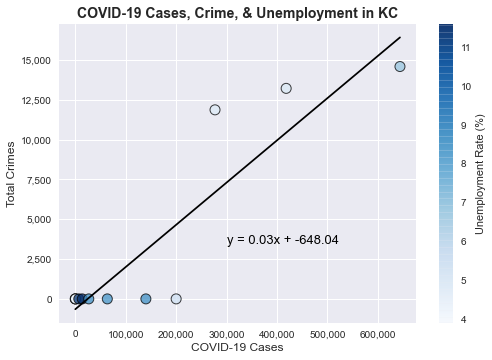

The correlation coefficient is: 0.91
The r-squared is: 0.82


In [29]:
# scatter plot and correlation between COVID-19 cases and crime
x = all_df["COVID-19 Cases"]
y = all_df["Crimes"]
ratio = all_df["Unemployment Rate (%)"]

plt.style.use('seaborn')

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = "o", c = ratio, cmap = "Blues", s = 100, alpha = 0.75, edgecolor = 'black', linewidth = 1)

cbar = plt.colorbar()
cbar.set_label('Unemployment Rate (%)')

plt.plot(x, regress_values, "black")
plt.annotate(line_eq, (300000, 3500), fontsize=13, color="black")
plt.title("COVID-19 Cases, Crime, & Unemployment in KC", fontsize = 14, fontweight = "bold")
plt.xlabel("COVID-19 Cases", fontsize = 12)
plt.ylabel("Total Crimes", fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/covid_cases_crime.png")
plt.show()
print(f"The correlation coefficient is: {round(correlation[0], 2)}")
print(f"The r-squared is: {round(rvalue**2, 2)}")

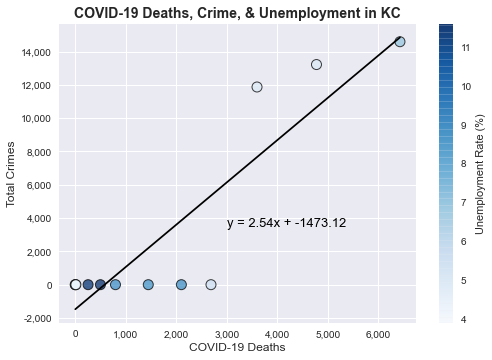

The correlation coefficient is: 0.89
The r-squared is: 0.8


In [30]:
# scatter plot and correlation between COVID-19 deaths and crime
x = all_df["COVID-19 Deaths"]
y = all_df["Crimes"]
ratio = all_df["Unemployment Rate (%)"]

plt.style.use('seaborn')

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = "o", c = ratio, cmap = "Blues", s = 100, alpha = 0.75, edgecolor = 'black', linewidth = 1)

cbar = plt.colorbar()
cbar.set_label('Unemployment Rate (%)')

plt.plot(x, regress_values, "black")
plt.annotate(line_eq, (3000, 3500), fontsize=13, color="black")
plt.title("COVID-19 Deaths, Crime, & Unemployment in KC", fontsize = 14, fontweight = "bold")
plt.xlabel("COVID-19 Deaths", fontsize = 12)
plt.ylabel("Total Crimes", fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/covid_deaths_crime.png")
plt.show()
print(f"The correlation coefficient is: {round(correlation[0], 2)}")
print(f"The r-squared is: {round(rvalue**2, 2)}")